In [2]:
import pandas as pd # IMPORTS
import matplotlib.pyplot as plt
import numpy as np
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re

## Read the dataset in

1. Some characters aren't encoded in UTF-8 so I had to use ISO-8859-1 which worked
2. Got rid of the rows that aren't needed. I just kept the result (target) and the tweet (text)

In [3]:
df = pd.read_csv("../model-files/tweets.csv", encoding='ISO-8859-1', names = ['target', 'ids', 'date', 'flag', 'user', 'text']) # Need to set encode as ISO-8859-1 because file contains characters that are not encoded in UTF-8., this one works apparently

# Also need to name the columns manually

In [4]:
df.head() # Check that the columns were processed correctly

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [54]:
df = df.iloc[:, [0, 5]]  # Get rid of the rows we don't need

In [55]:
df.head() # Check that we got rid of the rows we don't need

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


### Plot the data to get an idea of the split

<AxesSubplot: >

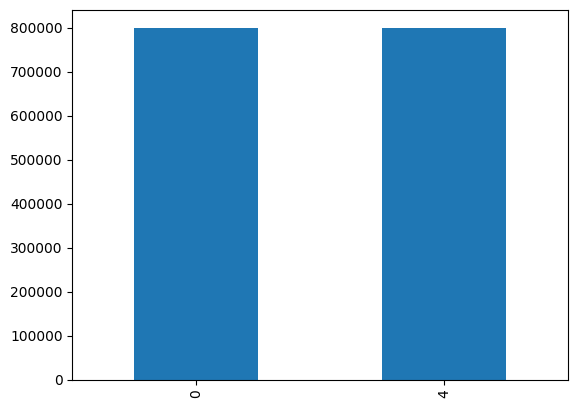

In [56]:
df['target'].value_counts().plot(kind='bar') # The dataset has an even split

In [57]:
positive_df = df.iloc[800000:, :]
negative_df = df.iloc[:800000, :]
positive_df

,target,text
800000,4,I LOVE @Health4UandPets u guys r the best!!
800001,4,im meeting up with one of my besties tonight! ...
800002,4,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800003,4,Being sick can be really cheap when it hurts t...
800004,4,@LovesBrooklyn2 he has that effect on everyone
...,...,...
1599995,4,Just woke up. Having no school is the best fee...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...


### Now read in NLTK's Twitter data

In [5]:
import json
# Read positive tweets
with open('../model-files/positive_tweets.json', 'r') as f:
    positive_tweets_data = [json.loads(line) for line in f]
with open('../model-files/negative_tweets.json', 'r') as f:
    negative_tweets_data = [json.loads(line) for line in f]

nltk_positive = pd.DataFrame(positive_tweets_data)
nltk_negative = pd.DataFrame(negative_tweets_data)
nltk_positive['target'] = 4
nltk_negative['target'] = 0

nltk_positive = nltk_positive.loc[:, ['target', 'text']]
nltk_negative = nltk_negative.loc[:, ['target', 'text']]
nltk_positive.head()

,target,text
0,4,#FollowFriday @France_Inte @PKuchly57 @Milipol...
1,4,@Lamb2ja Hey James! How odd :/ Please call our...
2,4,@DespiteOfficial we had a listen last night :)...
3,4,@97sides CONGRATS :)
4,4,yeaaaah yippppy!!! my accnt verified rqst has...


#### Append NLTK dataframes to the original two

In [59]:
for i in range(10): # Do it 10 times to give that dataset more "weight"
    positive_df = positive_df.append(nltk_positive)
    negative_df = negative_df.append(nltk_negative)

/var/folders/wh/j0mpnsjn5dn3d140byhbb9h80000gn/T/ipykernel_10852/2925534561.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  positive_df = positive_df.append(nltk_positive)
/var/folders/wh/j0mpnsjn5dn3d140byhbb9h80000gn/T/ipykernel_10852/2925534561.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  negative_df = negative_df.append(nltk_negative)
/var/folders/wh/j0mpnsjn5dn3d140byhbb9h80000gn/T/ipykernel_10852/2925534561.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  negative_df = negative_df.append(nltk_negative)
/var/folders/wh/j0mpnsjn5dn3d140byhbb9h80000gn/T/ipykernel_10852/2925534561.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

In [60]:
positive_df

,target,text
800000,4,I LOVE @Health4UandPets u guys r the best!!
800001,4,im meeting up with one of my besties tonight! ...
800002,4,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800003,4,Being sick can be really cheap when it hurts t...
800004,4,@LovesBrooklyn2 he has that effect on everyone
...,...,...
4995,4,"@chriswiggin3 Chris, that's great to hear :) D..."
4996,4,@RachelLiskeard Thanks for the shout-out :) It...
4997,4,@side556 Hey! :) Long time no talk...
4998,4,@staybubbly69 as Matt would say. WELCOME TO AD...


## Data Preprocessing
1. Load in stop words from NLTK to be used. These words should be removed as they don't help us determine sentiment and just serve to throw off our prediction
2. Use regex with the re library to remove links to websites and Twitter user handle mentions with @
3. Remove numbers
4. Remove punctuation
5. If a word has 3 or more consecutive letters, standardize it to have only 2
6. "Lemmatize" the word to reduce it to its root form, ex: change, changing, changes, changed, changer would all map to change

In [61]:
with open("../model-files/stop-words.txt") as f:
    stopwords = [line.strip() for line in f]
stopwords = set(stopwords)
stopwords # Check the stop words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

### Method that deals with the bulk of the pre-processing

Will map this function to each Tweet in the DataFrame

In [62]:
def preprocess_tweet(tweet):
    # Convert to lowercase
    tweet = tweet.lower()
    # Remove URLs. Match words that begin with http, http\S+, www, etc... and \S+ which is just one or more non-whitespace characters
    tweet = re.sub(r'\shttp\S+|\swww\S+|\shttps\S+', ' URL ', tweet, flags=re.MULTILINE)

    # Do they same as above but match with anything that ends with .com, .net, or website endings
    tweet = re.sub(r'\S+.com\s|\S+.net\s|\S+.org\s|\S+.co\s|\S+.us\s|\S+.edu\s|\S+.me\s|\S+.cn\s|\S+.uk\s|\S+.cn\s', ' URL ', tweet, flags=re.MULTILINE)
    # Get rid of @ mentions from the tweet dataset
    tweet = re.sub(r'@\S+', '', tweet, flags=re.MULTILINE)

    # Remove punctuation
    tweet = re.sub(r'\W', ' ', tweet)
    # Remove digits
    tweet = re.sub(r'\d+', '', tweet)

    # Tokenize the tweet (just store each word into a list)
    tokens = word_tokenize(tweet)

    tokens = [token for token in tokens if token not in stopwords] # Keep the ones that aren't a stop word
    # Lemmatize tokens, converting it back to its base form
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]


    # If a word has more than 3 consecutive characters, make it 2 characters instead
    for i in range(len(tokens)):
        chars_to_delete = list()
        for j in range(len(tokens[i]) - 2):
            if tokens[i][j] == tokens[i][j+1] and tokens[i][j] == tokens[i][j+2]:
                chars_to_delete.append(tokens[i][j])
        tokens[i] = list(tokens[i]) # Turn it into a list to delete specified values
        for ch in chars_to_delete: # Delete based off of the characters stored in chars_to_delete
            tokens[i].remove(ch)
        tokens[i] = "".join(tokens[i]) # Convert back into a string

    tokens = [token for token in tokens if len(token) > 1] # Get rid of random letters out and about from punctuation removal

    # Join tokens back into a string
    cleaned_tweet = ' '.join(tokens)
    return cleaned_tweet

### Playing around with regex

In [66]:
tweet = "@switchfoot http://twitpic.com/2y1zl - Awww, that'ssss a bummmmmmmer.  You shoulda got David Caaarrr of Third Day to do it. ;D"

preprocess_tweet(tweet)

'URL aww ss bummer shoulda got david caarr third day'

In [64]:
test = "before www.google.com happy playing"
test = re.sub(r'\S+.com\s|\S+.net\s|\S+.org\s|\S+.co\s|\S+.us\s|\S+.edu\s|\S+.me\s|\S+.cn\s|\S+.uk\s|\S+.cn\s', '', test, flags=re.MULTILINE)
test

'before happy playing'

In [65]:
test = "before @Kevin.Bruh I think you"
test = re.sub(r'\W', ' ', test)
tokens = word_tokenize(test)
tokens

['before', 'Kevin', 'Bruh', 'I', 'think', 'you']

## Final Stage

Apply the preprocess method on each row of the DataFrame and then save the processed data as a csv file to be worked with in inference_data.ipynb

In [67]:
positive_df['clean'] = positive_df['text'].apply(preprocess_tweet) 
negative_df['clean'] = negative_df['text'].apply(preprocess_tweet) 

In [72]:
positive_df

,target,text,clean
800000,4,I LOVE @Health4UandPets u guys r the best!!,love guy best
800001,4,im meeting up with one of my besties tonight! ...,im meeting one besties tonight cant wait girl ...
800002,4,"@DaRealSunisaKim Thanks for the Twitter add, S...",thanks twitter add sunisa got meet hin show dc...
800003,4,Being sick can be really cheap when it hurts t...,sick really cheap hurt much eat real food plus...
800004,4,@LovesBrooklyn2 he has that effect on everyone,effect everyone
...,...,...,...
4995,4,"@chriswiggin3 Chris, that's great to hear :) D...",chris great hear due time amp reminder indeed ...
4996,4,@RachelLiskeard Thanks for the shout-out :) It...,thanks shout great aboard
4997,4,@side556 Hey! :) Long time no talk...,hey long URL talk
4998,4,@staybubbly69 as Matt would say. WELCOME TO AD...,matt would say URL adulthood URL


In [71]:
negative_df

,target,text,clean
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",URL aww bummer shoulda got david carr third day
1,0,is upset that he can't update his Facebook by ...,upset update facebook texting might cry result...
2,0,@Kenichan I dived many times for the ball. Man...,dived many time ball managed save rest go bound
3,0,my whole body feels itchy and like its on fire,whole body feel itchy like fire
4,0,"@nationwideclass no, it's not behaving at all....",behaving mad see
...,...,...,...
4995,0,I wanna change my avi but uSanele :(,wan na change avi usanele
4996,0,MY PUPPY BROKE HER FOOT :(,puppy broke foot
4997,0,where's all the jaebum baby pictures :((,jaebum baby picture
4998,0,But but Mr Ahmad Maslan cooks too :( https://t...,mr ahmad maslan cook URL


In [76]:
df = negative_df.append(positive_df)
df

/var/folders/wh/j0mpnsjn5dn3d140byhbb9h80000gn/T/ipykernel_10852/3566637092.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = negative_df.append(positive_df)


,target,text,clean
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",URL aww bummer shoulda got david carr third day
1,0,is upset that he can't update his Facebook by ...,upset update facebook texting might cry result...
2,0,@Kenichan I dived many times for the ball. Man...,dived many time ball managed save rest go bound
3,0,my whole body feels itchy and like its on fire,whole body feel itchy like fire
4,0,"@nationwideclass no, it's not behaving at all....",behaving mad see
...,...,...,...
4995,4,"@chriswiggin3 Chris, that's great to hear :) D...",chris great hear due time amp reminder indeed ...
4996,4,@RachelLiskeard Thanks for the shout-out :) It...,thanks shout great aboard
4997,4,@side556 Hey! :) Long time no talk...,hey long URL talk
4998,4,@staybubbly69 as Matt would say. WELCOME TO AD...,matt would say URL adulthood URL


In [77]:
df.to_csv('../model-files/tweets-cleaned.csv', index=False) # Export the cleaned tweet dataframe as a new CSV file